# <center> <b>CNN and CNN+LSTM prototype defender of terroristics atacks <center> </b>

## <center> <b> process data <center> </b>

In [4]:
import numpy as np
import librosa.display
import os
import matplotlib.pyplot as plt
# !uv pip install soundfile
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_mp3(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.mp3', '.png'))
        print(input_file, output_file)
        create_spectrogram(input_file, output_file)

In [5]:
# import keras.utils as image
from keras.preprocessing import image

def load_images_from_path(path, label, method='direct'):
    images = []
    labels = []
    if method == 'direct':
        for file in os.listdir(path):
            # if file.startswith('converted_'):
            images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
            labels.append((label))
    else:
        images.append(image.img_to_array(image.load_img(f'{path}.png' , target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 20, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

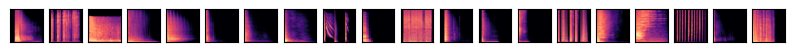

In [6]:
images, labels = load_images_from_path('Spectrograms/nuke', 0)
show_images(images)
    
x += images
y += labels

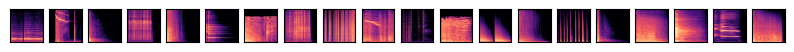

In [7]:
images, labels = load_images_from_path('Spectrograms/fireworks', 1)
show_images(images)
    
x += images
y += labels

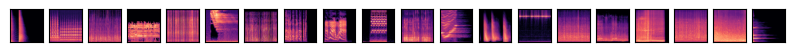

In [8]:
images, labels = load_images_from_path('Spectrograms/other', 2)
show_images(images)
    
x += images
y += labels

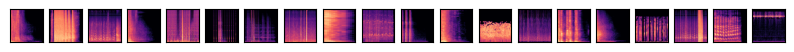

In [9]:
images, labels = load_images_from_path('Spectrograms/concatenate', 0)
show_images(images)
    
x += images
y += labels

In [10]:
# images, labels = load_images_from_path('Spectrograms/nuke_concatenate', 0)
# show_images(images)
    
# x += images
# y += labels

In [11]:
# images, labels = load_images_from_path('Spectrograms/etalons_concatenate', 0)
# show_images(images)
    
# x += images
# y += labels

In [12]:
# images, labels = load_images_from_path('Spectrograms/fireworks_concatenate', 1)
# show_images(images)
    
# x += images
# y += labels

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.15, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## <center> <b> models <center> </b>

### <center> <b> CNN without BatchNormalization <center> </b>

#### model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, LSTM, RepeatVector
from keras.layers import Flatten, Dense
import tensorflow as tf
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.backend import clear_session
clear_session()

f1_metrics = F1Score(num_classes=3, average='macro')

model_cnn_without_batch = Sequential()
model_cnn_without_batch.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn_without_batch.add(MaxPooling2D(2, 2))
model_cnn_without_batch.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn_without_batch.add(MaxPooling2D(2, 2))
model_cnn_without_batch.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn_without_batch.add(MaxPooling2D(2, 2))
model_cnn_without_batch.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn_without_batch.add(MaxPooling2D(2, 2))
model_cnn_without_batch.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn_without_batch.add(MaxPooling2D(2, 2))
model_cnn_without_batch.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn_without_batch.add(MaxPooling2D(2, 2))
model_cnn_without_batch.add(Flatten())
model_cnn_without_batch.add(Dense(256, activation='relu'))
model_cnn_without_batch.add(Dense(3, activation='softmax'))
model_cnn_without_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',
                                                                        tf.keras.metrics.Precision(),
                                                                        tf.keras.metrics.Recall(),
                                                                        f1_metrics])
model_cnn_without_batch.summary()
tf.random.set_seed(42)

c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\anaconda3\envs\protect_of_terrorist_attacks\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.3 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 256)     147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       590080    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

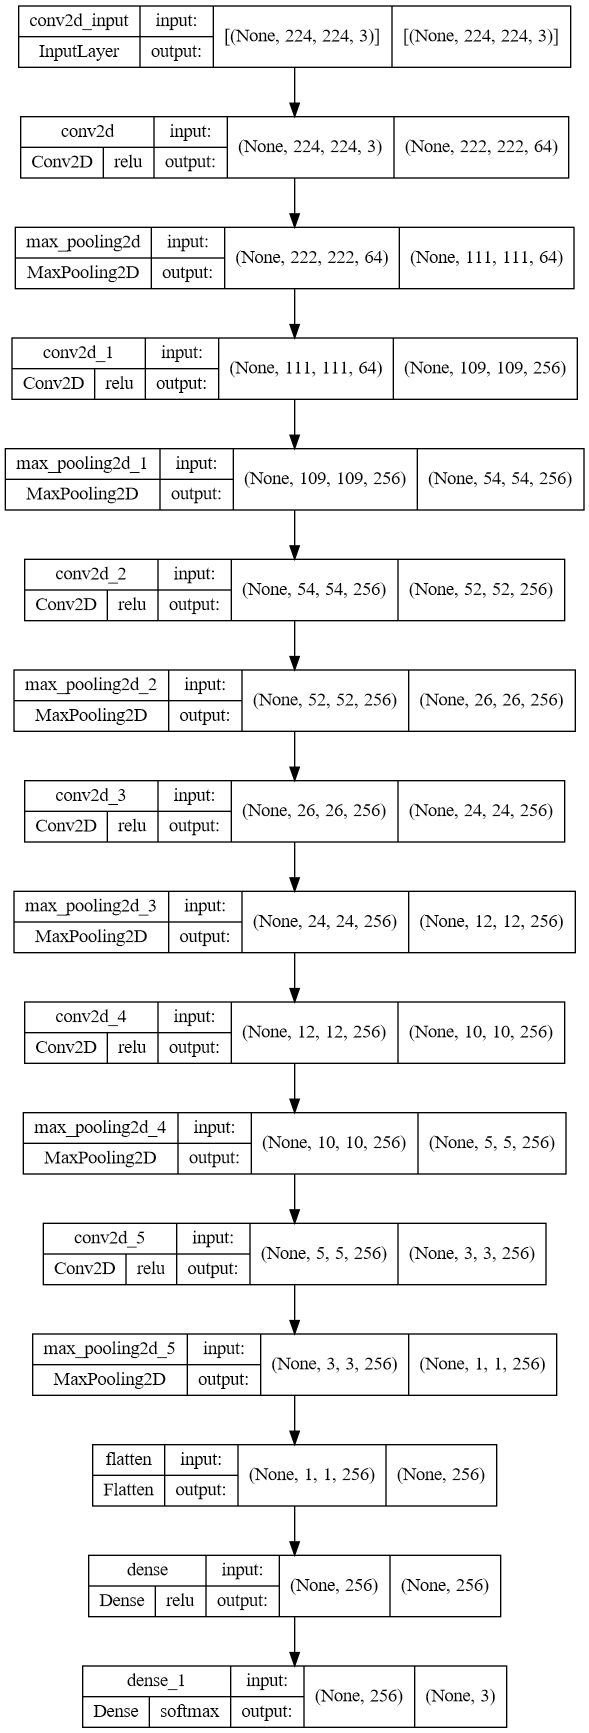

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model_cnn_without_batch, r'C:\My_projects\nuke\metrics\architecture\CNN_without_BatchNormalization.png', show_shapes=True, show_layer_activations = True)

In [19]:
hist_cnn_without_batch = model_cnn_without_batch.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=32, epochs=20)

Epoch 1/20
63/63 [==============================] - 11s 155ms/step - loss: 0.8825 - accuracy: 0.6492 - precision: 0.6766 - recall: 0.5536 - f1_score: 0.2923 - val_loss: 0.8112 - val_accuracy: 0.6789 - val_precision: 0.6789 - val_recall: 0.6789 - val_f1_score: 0.2696
Epoch 2/20
63/63 [==============================] - 9s 143ms/step - loss: 0.8098 - accuracy: 0.6776 - precision: 0.6776 - recall: 0.6776 - f1_score: 0.2693 - val_loss: 0.8025 - val_accuracy: 0.6789 - val_precision: 0.6789 - val_recall: 0.6789 - val_f1_score: 0.2696
Epoch 3/20
63/63 [==============================] - 9s 142ms/step - loss: 0.7879 - accuracy: 0.6776 - precision: 0.6772 - recall: 0.6731 - f1_score: 0.2693 - val_loss: 0.8133 - val_accuracy: 0.6789 - val_precision: 0.6789 - val_recall: 0.6789 - val_f1_score: 0.2696
Epoch 4/20
63/63 [==============================] - 9s 142ms/step - loss: 0.7917 - accuracy: 0.6776 - precision: 0.6831 - recall: 0.6692 - f1_score: 0.2693 - val_loss: 0.8025 - val_accuracy: 0.6789 - v

In [49]:
model_cnn_without_batch.save(r'C:\My_projects\nuke\models\CNN_without_BatchNormalization')

INFO:tensorflow:Assets written to: C:\My_projects\nuke\models\CNN_without_BatchNormalization\assets


#### visualize

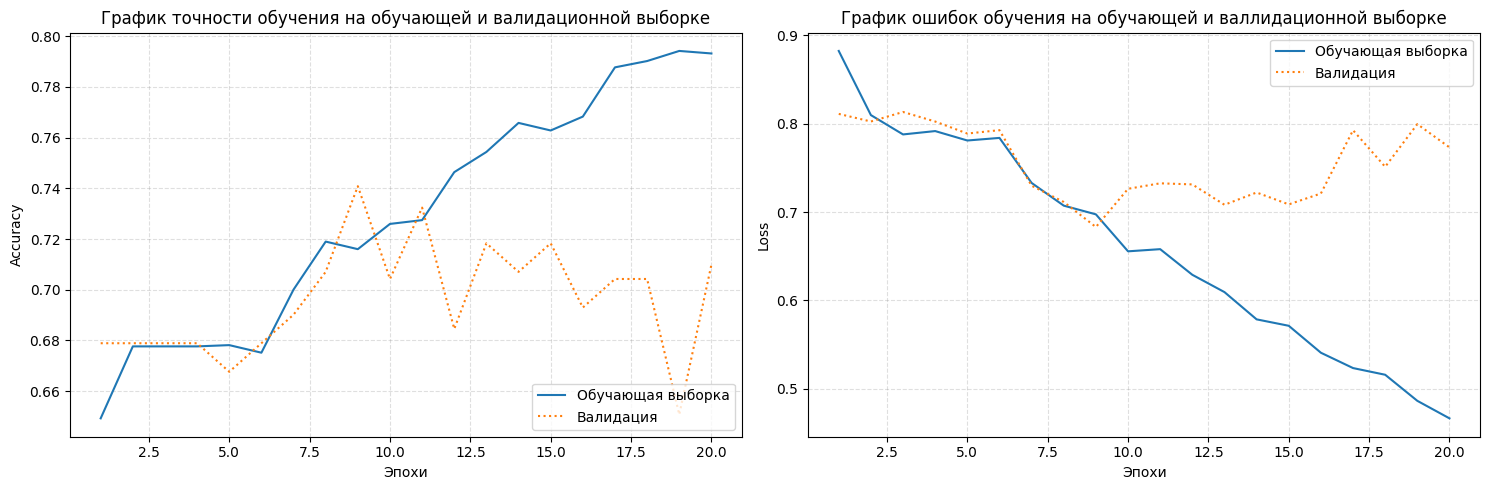

In [20]:
acc_plot = hist_cnn_without_batch.history['accuracy']
ls_plot = hist_cnn_without_batch.history['loss']

val_acc_plot = hist_cnn_without_batch.history['val_accuracy']

val_ls_plot = hist_cnn_without_batch.history['val_loss']
epochs = list(range(1, len(acc_plot) + 1))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_acc_plot, ':', label='Валидация')
plt.title('График точности обучения на обучающей и валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

# plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, ls_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_ls_plot, ':', label='Валидация')
plt.title('График ошибок обучения на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()
plt.savefig(r'C:\My_projects\nuke\metrics\matplot\CNN_without_BatchNormalization_metrics_accuracy_and_loss.png')
plt.show()

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py

acc_plot = hist_cnn_without_batch.history['accuracy']
ls_plot = hist_cnn_without_batch.history['loss']

val_acc_plot = hist_cnn_without_batch.history['val_accuracy']

val_ls_plot = hist_cnn_without_batch.history['val_loss']
epochs = list(range(1, len(acc_plot) + 1))

fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Accuracy</b>", "<b>Loss</b>",), horizontal_spacing=0.05)

# Accuracy
fig.add_trace(go.Scatter(x=list(epochs), y=acc_plot, legendgroup='<b>Training</b>', name='<b>Training</b>',
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(epochs), y=val_acc_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>',
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=1)

# Loss
fig.add_trace(go.Scatter(x=list(epochs), y=ls_plot, legendgroup='<b>Training</b>', name='<b>Training</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=2)
fig.add_trace(go.Scatter(x=list(epochs), y=val_ls_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=2)


fig.update_traces(hovertemplate='Epoch: %{x}<br>Value: %{y}')

fig.update_yaxes(title_text="<b>Показатели</b>")
fig.update_xaxes(title_text="<b>Эпохи</b>")
fig.update_layout(legend=dict(font=dict(size=14), bgcolor='lightgray'))


fig.update_layout(
    height=550, 
    width=2000, 
    title_text="<b>Метрики обучения</b>",
    legend=dict(
        font=dict(size=14),
        bgcolor='rgba(240, 240, 240, 0.5)',
        bordercolor='rgba(200, 200, 200, 1)',
        borderwidth=1,
    ),
    plot_bgcolor='rgba(210, 210, 210, 0.5)',
    
    # paper_bgcolor='rgba(250, 250, 250, 1)'
)
fig.update_xaxes(range=[0.5, max(epochs)+0.3])
py.plot(fig, filename=r'C:\My_projects\nuke\metrics\plotly\CNN_without_BatchNormalization_metrics_accuracy_and_loss.html')
fig.write_image(r"C:\My_projects\nuke\metrics\plotly\CNN_without_BatchNormalization_metrics_accuracy_and_loss.svg")
fig.show()

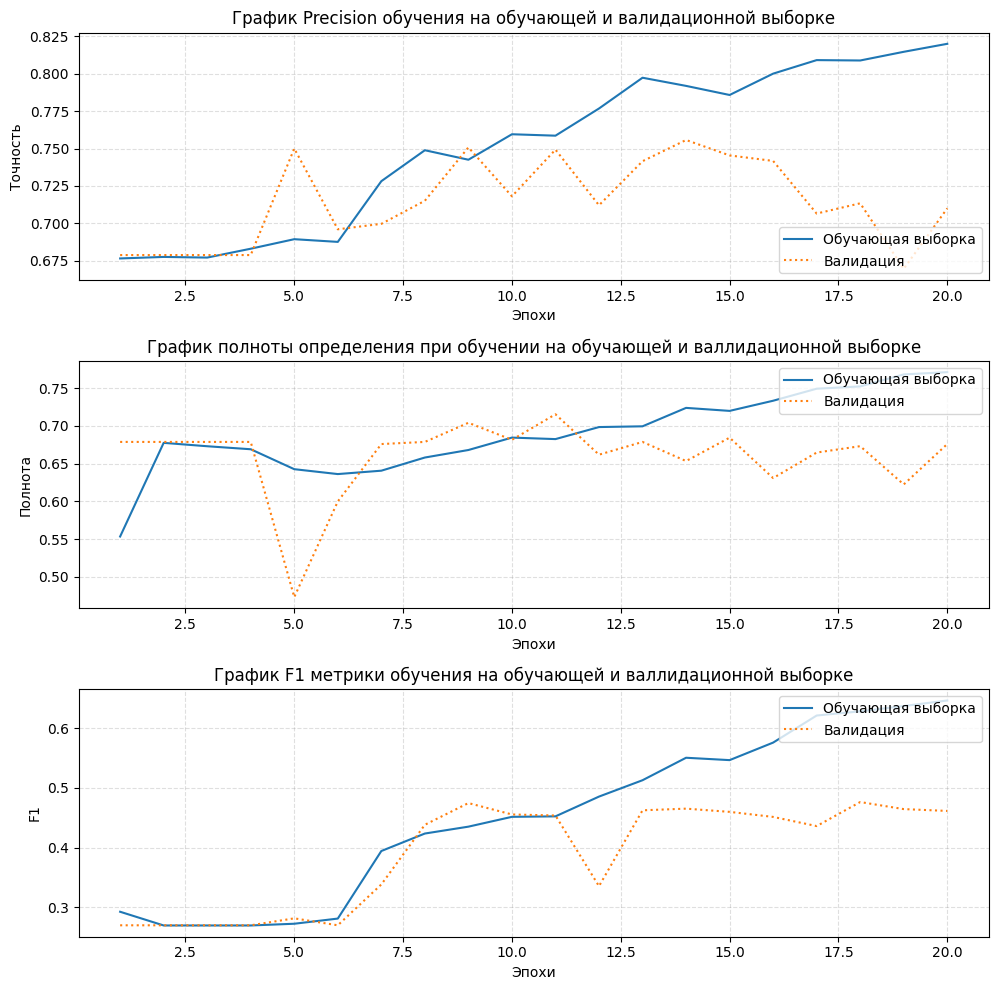

In [22]:
precision_plot = hist_cnn_without_batch.history['precision']
recall_plot = hist_cnn_without_batch.history['recall']
f1_plot = hist_cnn_without_batch.history['f1_score']

val_precision_plot = hist_cnn_without_batch.history['val_precision']
val_recall_plot = hist_cnn_without_batch.history['val_recall']
val_f1_plot = hist_cnn_without_batch.history['val_f1_score']

epochs = list(range(1, len(precision_plot) + 1))

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, индекс 1
plt.plot(epochs, precision_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_precision_plot, ':', label='Валидация')
plt.title('График Precision обучения на обучающей и валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

# plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 2)
plt.plot(epochs, recall_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_recall_plot, ':', label='Валидация')
plt.title('График полноты определения при обучении на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Полнота')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(epochs, f1_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_f1_plot, ':', label='Валидация')
plt.title('График F1 метрики обучения на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('F1')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()
plt.savefig(r'C:\My_projects\nuke\metrics\matplot\CNN_without_BatchNormalization_metrics_precision_and_recall_and_f1.png')
plt.show()

In [23]:
import plotly.graph_objects as go
import plotly.offline as py
from plotly.subplots import make_subplots

precision_plot = hist_cnn_without_batch.history['precision']
recall_plot = hist_cnn_without_batch.history['recall']
f1_plot = hist_cnn_without_batch.history['f1_score']

val_precision_plot = hist_cnn_without_batch.history['val_precision']
val_recall_plot = hist_cnn_without_batch.history['val_recall']
val_f1_plot = hist_cnn_without_batch.history['val_f1_score']

epochs = list(range(1, len(precision_plot) + 1))

fig = make_subplots(rows=1, cols=3, subplot_titles=("<b>Precision</b>", "<b>Recall</b>", "<b>F1-score</b>"), horizontal_spacing=0.05)

# Precision
fig.add_trace(go.Scatter(x=list(epochs), y=precision_plot, legendgroup='<b>Training</b>', name='<b>Training</b>',
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(epochs), y=val_precision_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>',
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=1)

# Recall
fig.add_trace(go.Scatter(x=list(epochs), y=recall_plot, legendgroup='<b>Training</b>', name='<b>Training</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=2)
fig.add_trace(go.Scatter(x=list(epochs), y=val_recall_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=2)

# F1-score
fig.add_trace(go.Scatter(x=list(epochs), y=f1_plot, legendgroup='<b>Training</b>', name='<b>Training</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=3)
fig.add_trace(go.Scatter(x=list(epochs), y=val_f1_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>', showlegend=False, 
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=3)


fig.update_traces(hovertemplate='Epoch: %{x}<br>Value: %{y}')

fig.update_yaxes(title_text="<b>Показатели</b>")
fig.update_xaxes(title_text="<b>Эпохи</b>")
fig.update_layout(legend=dict(font=dict(size=14), bgcolor='lightgray'))


fig.update_layout(
    height=550, 
    width=3000, 
    title_text="<b>Метрики обучения</b>",
    legend=dict(
        font=dict(size=14),
        bgcolor='rgba(240, 240, 240, 0.5)',
        bordercolor='rgba(200, 200, 200, 1)',
        borderwidth=1,
    ),
    plot_bgcolor='rgba(210, 210, 210, 0.5)',
    
    # paper_bgcolor='rgba(250, 250, 250, 1)'
)
fig.update_xaxes(range=[0.5, max(epochs)+0.3])
py.plot(fig, filename=r'C:\My_projects\nuke\metrics\plotly\CNN_without_BatchNormalization_metrics_precision_and_recall_and_f1.html')
fig.write_image(r"C:\My_projects\nuke\metrics\plotly\CNN_without_BatchNormalization_metrics_precision_and_recall_and_f1.svg")
fig.show()

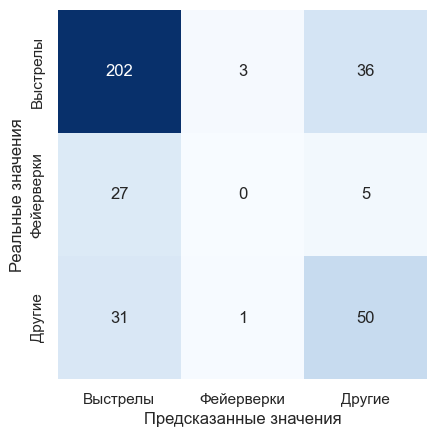

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model_cnn_without_batch.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))

class_labels = ['Выстрелы', 'Фейерверки', 'Другие']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.savefig(r'C:\My_projects\nuke\metrics\confusion_matrix_CNN_without_BatchNormalization.png')

#### test model

In [25]:
images, labels = load_images_from_path('Spectrograms/samples/1408_mixdown', 0, 'l')
# show_images(images)
    
x = images
y_real = labels
images, labels = load_images_from_path('Spectrograms/samples/IMG_9658', 0, 'l')
x += images
y_real += labels

In [26]:
y = model_cnn_without_batch.predict(np.array(x) / 255)

In [27]:
class_labels = ['Выстрелы и взывы', 'Фейерверки', 'Другие']
for k in range(len(y_real)):
    for i, label in enumerate(class_labels):
        print(f'{label}: {y[k][i]}')

Выстрелы и взывы: 0.9903135299682617
Фейерверки: 0.0067191650159657
Другие: 0.002967346925288439
Выстрелы и взывы: 0.3711947500705719
Фейерверки: 0.01052001304924488
Другие: 0.6182852387428284


### <center> <b> CNN with BatchNormalization <center> </b>

#### model

In [101]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.backend import clear_session
clear_session()
from keras.callbacks import TensorBoard

f1_metrics = F1Score(num_classes=3, average='macro')
tensorboard_callback = TensorBoard(log_dir='./logs/CNN', histogram_freq=1)

model_cnn_with_batch = Sequential()
model_cnn_with_batch.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn_with_batch.add(BatchNormalization())  # Add Batch Normalization after Conv2D
model_cnn_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_with_batch.add(Dropout(0.25))
model_cnn_with_batch.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn_with_batch.add(BatchNormalization())  # Add Batch Normalization after Conv2D
model_cnn_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_with_batch.add(Dropout(0.25))

model_cnn_with_batch.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_cnn_with_batch.add(BatchNormalization())  # Add Batch Normalization after Conv2D
model_cnn_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_with_batch.add(Dropout(0.25))
model_cnn_with_batch.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_cnn_with_batch.add(BatchNormalization())  # Add Batch Normalization after Conv2D
model_cnn_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_with_batch.add(Dropout(0.75))
model_cnn_with_batch.add(Flatten())
model_cnn_with_batch.add(Dense(64, activation='relu'))
model_cnn_with_batch.add(BatchNormalization())  # Add Batch Normalization after Dense
model_cnn_with_batch.add(Dense(32, activation='relu'))  # Add one more Dense layer
model_cnn_with_batch.add(Dropout(0.5))
model_cnn_with_batch.add(Dense(3, activation='softmax'))
model_cnn_with_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',
                                                                        tf.keras.metrics.Precision(),
                                                                        tf.keras.metrics.Recall(),
                                                                        f1_metrics])
model_cnn_with_batch.summary()
tf.random.set_seed(42)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     2

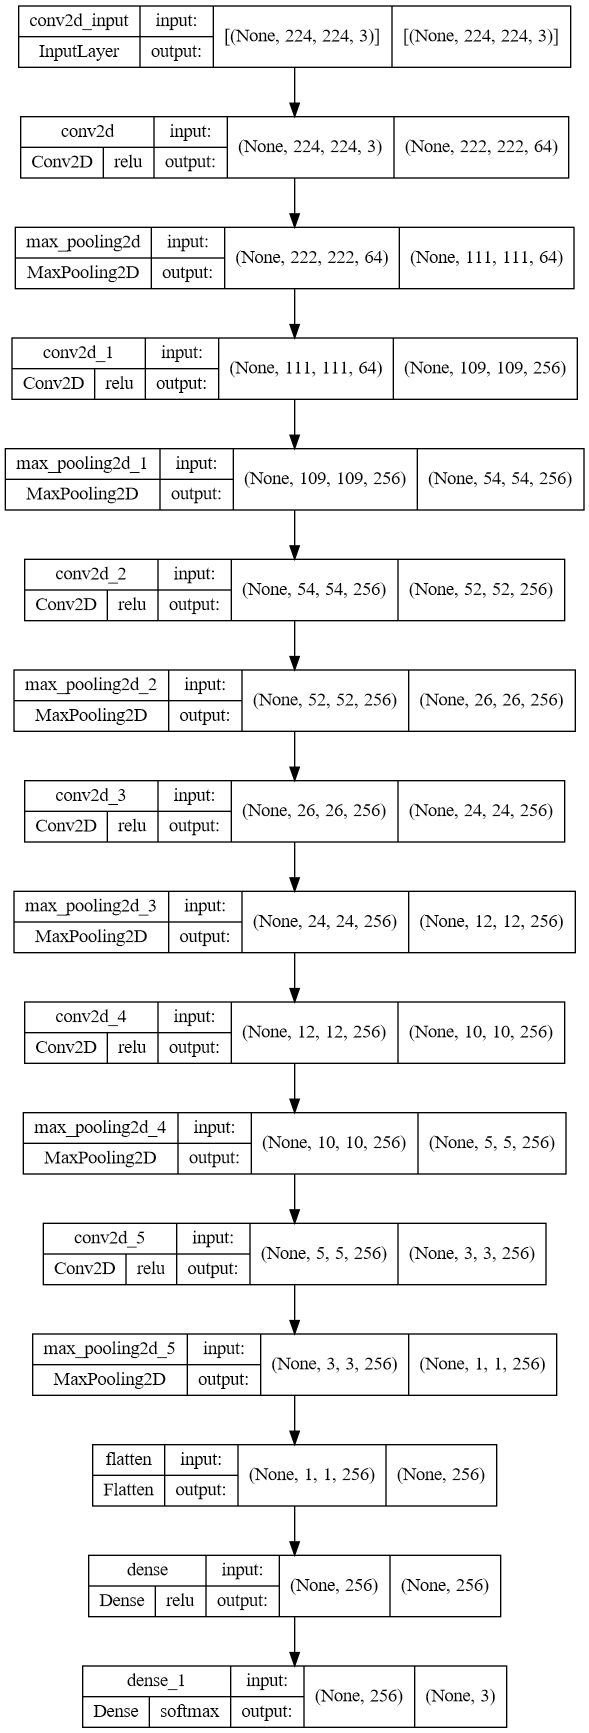

In [81]:
from keras.utils.vis_utils import plot_model
plot_model(model_cnn_without_batch, r'C:\My_projects\nuke\metrics\architecture\CNN_with_BatchNormalization.png', show_shapes=True, show_layer_activations = True)

In [ ]:
hist_cnn_with_batch = model_cnn_with_batch.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=32, epochs=50, callbacks=[tensorboard_callback])

In [91]:
model_cnn_with_batch.save(r'C:\My_projects\nuke\models\CNN_with_BatchNormalization')

INFO:tensorflow:Assets written to: C:\My_projects\nuke\models\CNN_with_BatchNormalization(best2)\assets


INFO:tensorflow:Assets written to: C:\My_projects\nuke\models\CNN_with_BatchNormalization(best2)\assets


#### visualize

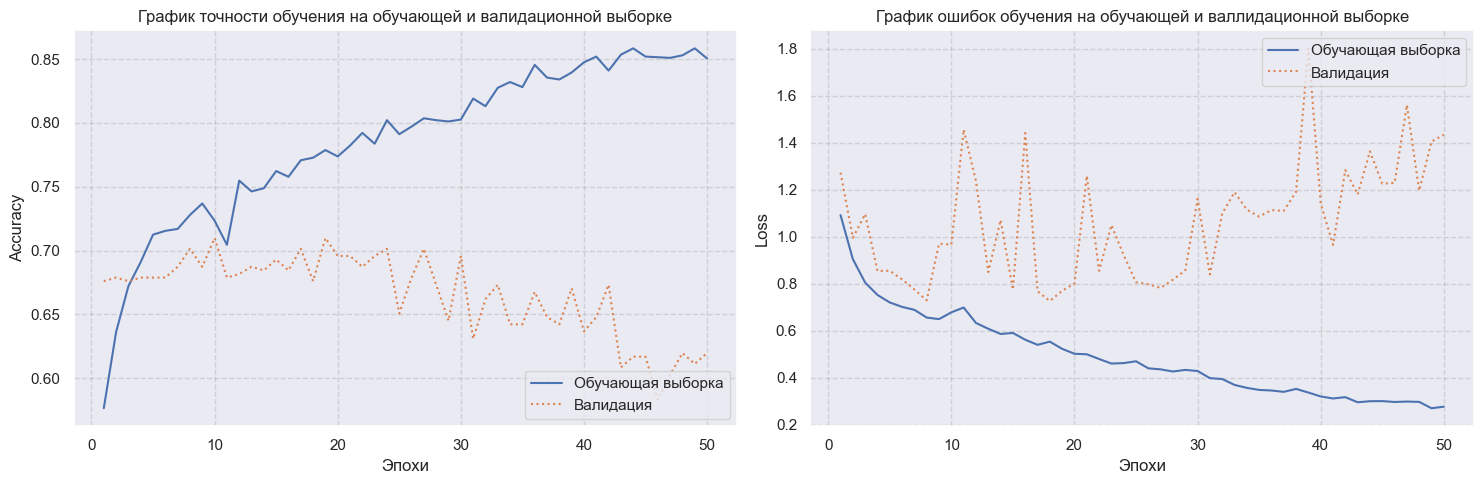

In [83]:
acc_plot = hist_cnn_with_batch.history['accuracy']
ls_plot = hist_cnn_with_batch.history['loss']

val_acc_plot = hist_cnn_with_batch.history['val_accuracy']

val_ls_plot = hist_cnn_with_batch.history['val_loss']
epochs = list(range(1, len(acc_plot) + 1))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_acc_plot, ':', label='Валидация')
plt.title('График точности обучения на обучающей и валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

# plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, ls_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_ls_plot, ':', label='Валидация')
plt.title('График ошибок обучения на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()
plt.savefig(r'C:\My_projects\nuke\metrics\matplot\CNN_with_BatchNormalization_metrics_accuracy_and_loss.png')
plt.show()

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py

acc_plot = hist_cnn_with_batch.history['accuracy']
ls_plot = hist_cnn_with_batch.history['loss']

val_acc_plot = hist_cnn_with_batch.history['val_accuracy']

val_ls_plot = hist_cnn_with_batch.history['val_loss']
epochs = list(range(1, len(acc_plot) + 1))

fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Accuracy</b>", "<b>Loss</b>",), horizontal_spacing=0.05)

# Accuracy
fig.add_trace(go.Scatter(x=list(epochs), y=acc_plot, legendgroup='<b>Training</b>', name='<b>Training</b>',
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(epochs), y=val_acc_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>',
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=1)

# Loss
fig.add_trace(go.Scatter(x=list(epochs), y=ls_plot, legendgroup='<b>Training</b>', name='<b>Training</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=2)
fig.add_trace(go.Scatter(x=list(epochs), y=val_ls_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=2)


fig.update_traces(hovertemplate='Epoch: %{x}<br>Value: %{y}')

fig.update_yaxes(title_text="<b>Показатели</b>")
fig.update_xaxes(title_text="<b>Эпохи</b>")
fig.update_layout(legend=dict(font=dict(size=14), bgcolor='lightgray'))


fig.update_layout(
    height=550, 
    width=2000, 
    title_text="<b>Метрики обучения</b>",
    legend=dict(
        font=dict(size=14),
        bgcolor='rgba(240, 240, 240, 0.5)',
        bordercolor='rgba(200, 200, 200, 1)',
        borderwidth=1,
    ),
    plot_bgcolor='rgba(210, 210, 210, 0.5)',
    
    # paper_bgcolor='rgba(250, 250, 250, 1)'
)
fig.update_xaxes(range=[0.5, max(epochs)+0.3])
py.plot(fig, filename=r'C:\My_projects\nuke\metrics\plotly\CNN_with_BatchNormalization_metrics_accuracy_and_loss.html')
fig.write_image(r"C:\My_projects\nuke\metrics\plotly\CNN_with_BatchNormalization_metrics_accuracy_and_loss.svg")
fig.show()

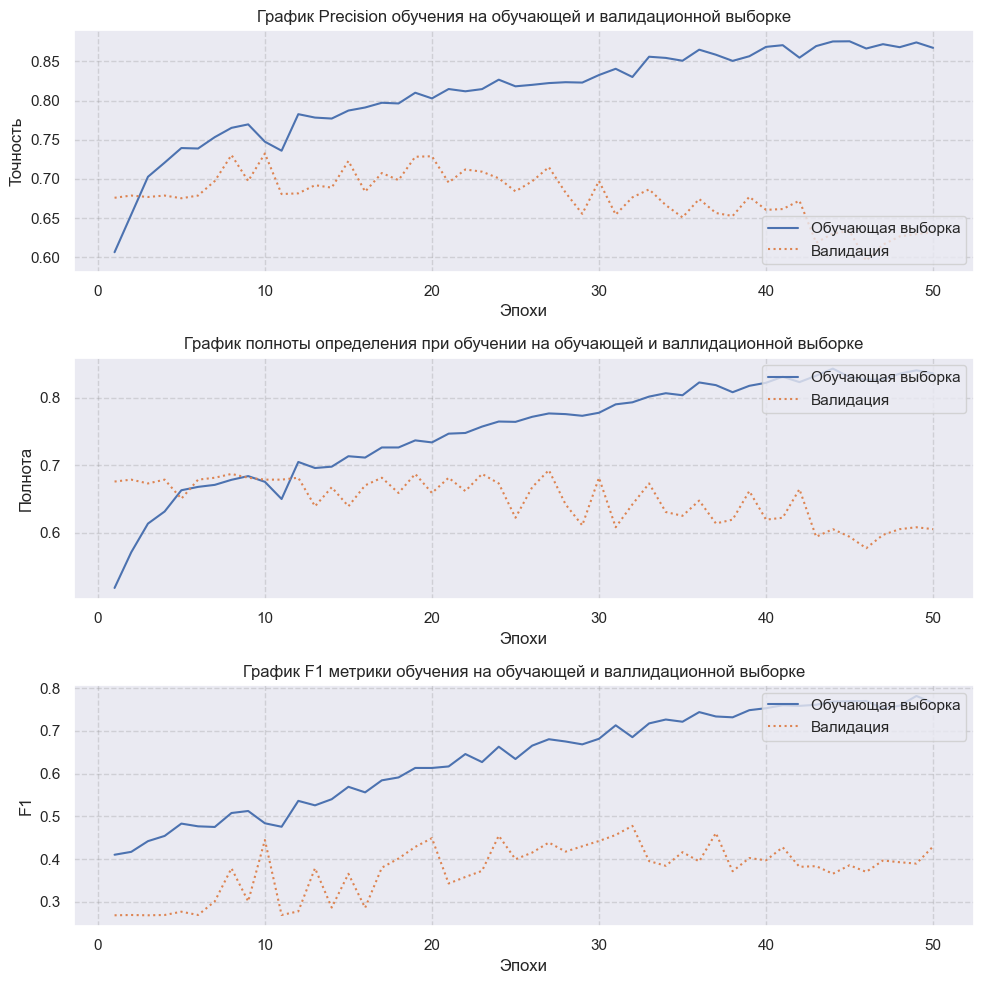

In [85]:
precision_plot = hist_cnn_with_batch.history['precision']
recall_plot = hist_cnn_with_batch.history['recall']
f1_plot = hist_cnn_with_batch.history['f1_score']

val_precision_plot = hist_cnn_with_batch.history['val_precision']
val_recall_plot = hist_cnn_with_batch.history['val_recall']
val_f1_plot = hist_cnn_with_batch.history['val_f1_score']

epochs = list(range(1, len(precision_plot) + 1))

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, индекс 1
plt.plot(epochs, precision_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_precision_plot, ':', label='Валидация')
plt.title('График Precision обучения на обучающей и валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

# plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 2)
plt.plot(epochs, recall_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_recall_plot, ':', label='Валидация')
plt.title('График полноты определения при обучении на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Полнота')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(epochs, f1_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_f1_plot, ':', label='Валидация')
plt.title('График F1 метрики обучения на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('F1')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()
plt.savefig(r'C:\My_projects\nuke\metrics\matplot\CNN_with_BatchNormalization_metrics_precision_and_recall_and_f1.png')
plt.show()

In [86]:
import plotly.graph_objects as go
import plotly.offline as py
from plotly.subplots import make_subplots

precision_plot = hist_cnn_with_batch.history['precision']
recall_plot = hist_cnn_with_batch.history['recall']
f1_plot = hist_cnn_with_batch.history['f1_score']

val_precision_plot = hist_cnn_with_batch.history['val_precision']
val_recall_plot = hist_cnn_with_batch.history['val_recall']
val_f1_plot = hist_cnn_with_batch.history['val_f1_score']

epochs = list(range(1, len(precision_plot) + 1))

fig = make_subplots(rows=1, cols=3, subplot_titles=("<b>Precision</b>", "<b>Recall</b>", "<b>F1-score</b>"), horizontal_spacing=0.05)

# Precision
fig.add_trace(go.Scatter(x=list(epochs), y=precision_plot, legendgroup='<b>Training</b>', name='<b>Training</b>',
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(epochs), y=val_precision_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>',
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=1)

# Recall
fig.add_trace(go.Scatter(x=list(epochs), y=recall_plot, legendgroup='<b>Training</b>', name='<b>Training</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=2)
fig.add_trace(go.Scatter(x=list(epochs), y=val_recall_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=2)

# F1-score
fig.add_trace(go.Scatter(x=list(epochs), y=f1_plot, legendgroup='<b>Training</b>', name='<b>Training</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=3)
fig.add_trace(go.Scatter(x=list(epochs), y=val_f1_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>', showlegend=False, 
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=3)


fig.update_traces(hovertemplate='Epoch: %{x}<br>Value: %{y}')

fig.update_yaxes(title_text="<b>Показатели</b>")
fig.update_xaxes(title_text="<b>Эпохи</b>")
fig.update_layout(legend=dict(font=dict(size=14), bgcolor='lightgray'))


fig.update_layout(
    height=550, 
    width=3000, 
    title_text="<b>Метрики обучения</b>",
    legend=dict(
        font=dict(size=14),
        bgcolor='rgba(240, 240, 240, 0.5)',
        bordercolor='rgba(200, 200, 200, 1)',
        borderwidth=1,
    ),
    plot_bgcolor='rgba(210, 210, 210, 0.5)',
    
    # paper_bgcolor='rgba(250, 250, 250, 1)'
)
fig.update_xaxes(range=[0.5, max(epochs)+0.3])
py.plot(fig, filename=r'C:\My_projects\nuke\metrics\plotly\CNN_with_BatchNormalization_metrics_precision_and_recall_and_f1.html')
fig.write_image(r"C:\My_projects\nuke\metrics\plotly\CNN_with_BatchNormalization_metrics_precision_and_recall_and_f1.svg")
fig.show()

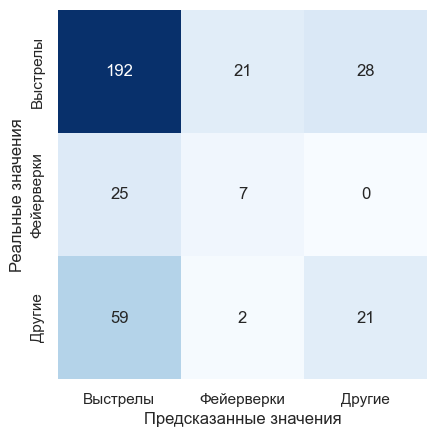

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model_cnn_with_batch.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))

class_labels = ['Выстрелы', 'Фейерверки', 'Другие']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.savefig(r'C:\My_projects\nuke\metrics\confusion_matrix_CNN_with_BatchNormalization.png')

#### test model

In [88]:
images, labels = load_images_from_path('Spectrograms/samples/2024-11-19 18-28-18', 0, 'l')
# show_images(images)
    
x = images
y_real = labels
images, labels = load_images_from_path('Spectrograms/samples/IMG_9658', 0, 'l')
x += images
y_real += labels
images, labels = load_images_from_path('Spectrograms/samples/Chiikawa Usagi', 0, 'l')
x += images
y_real += labels

In [89]:
y = model_cnn_with_batch.predict(np.array(x) / 255)

In [90]:
class_labels = ['Выстрелы', 'Фейерверки', 'Другие']
for k in range(len(y_real)):
    for i, label in enumerate(class_labels):
        print(f'{label}: {y[k][i]}')

Выстрелы: 0.32664528489112854
Фейерверки: 0.005378962494432926
Другие: 0.6679757833480835
Выстрелы: 0.9092864990234375
Фейерверки: 0.0044557866640388966
Другие: 0.08625766634941101
Выстрелы: 0.009517775848507881
Фейерверки: 0.00028067067614756525
Другие: 0.9902015328407288


### <center> <b> CNN + LSTM with BatchNormalization <center> </b>

#### model

In [64]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape, BatchNormalization
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.backend import clear_session
clear_session()

f1_metrics = F1Score(num_classes=3, average='macro')

model_cnn_p_lstm_with_batch = Sequential()
model_cnn_p_lstm_with_batch.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn_p_lstm_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_p_lstm_with_batch.add(Dropout(0.25))
model_cnn_p_lstm_with_batch.add(BatchNormalization()) 
model_cnn_p_lstm_with_batch.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn_p_lstm_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_p_lstm_with_batch.add(Dropout(0.25))
model_cnn_p_lstm_with_batch.add(BatchNormalization())
model_cnn_p_lstm_with_batch.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_cnn_p_lstm_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_p_lstm_with_batch.add(Dropout(0.25))
model_cnn_p_lstm_with_batch.add(BatchNormalization()) 
model_cnn_p_lstm_with_batch.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_cnn_p_lstm_with_batch.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_p_lstm_with_batch.add(Dropout(0.25))
model_cnn_p_lstm_with_batch.add(BatchNormalization())
model_cnn_p_lstm_with_batch.add(Flatten())
model_cnn_p_lstm_with_batch.add(Dense(128, activation='relu'))
model_cnn_p_lstm_with_batch.add(Dropout(0.5))
model_cnn_p_lstm_with_batch.add(BatchNormalization())

model_cnn_p_lstm_with_batch.add(Reshape((1, -1)))

model_cnn_p_lstm_with_batch.add(LSTM(128, activation='relu', return_sequences=True))
model_cnn_p_lstm_with_batch.add(Dropout(0.5))
model_cnn_p_lstm_with_batch.add(BatchNormalization())

model_cnn_p_lstm_with_batch.add(LSTM(64, activation='relu'))
model_cnn_p_lstm_with_batch.add(Dropout(0.5))
model_cnn_p_lstm_with_batch.add(BatchNormalization())
model_cnn_p_lstm_with_batch.add(Dense(3, activation='softmax'))

model_cnn_p_lstm_with_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',
                                                                        tf.keras.metrics.Precision(),
                                                                        tf.keras.metrics.Recall(),
                                                                        f1_metrics])
model_cnn_p_lstm_with_batch.summary()
tf.random.set_seed(42)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0

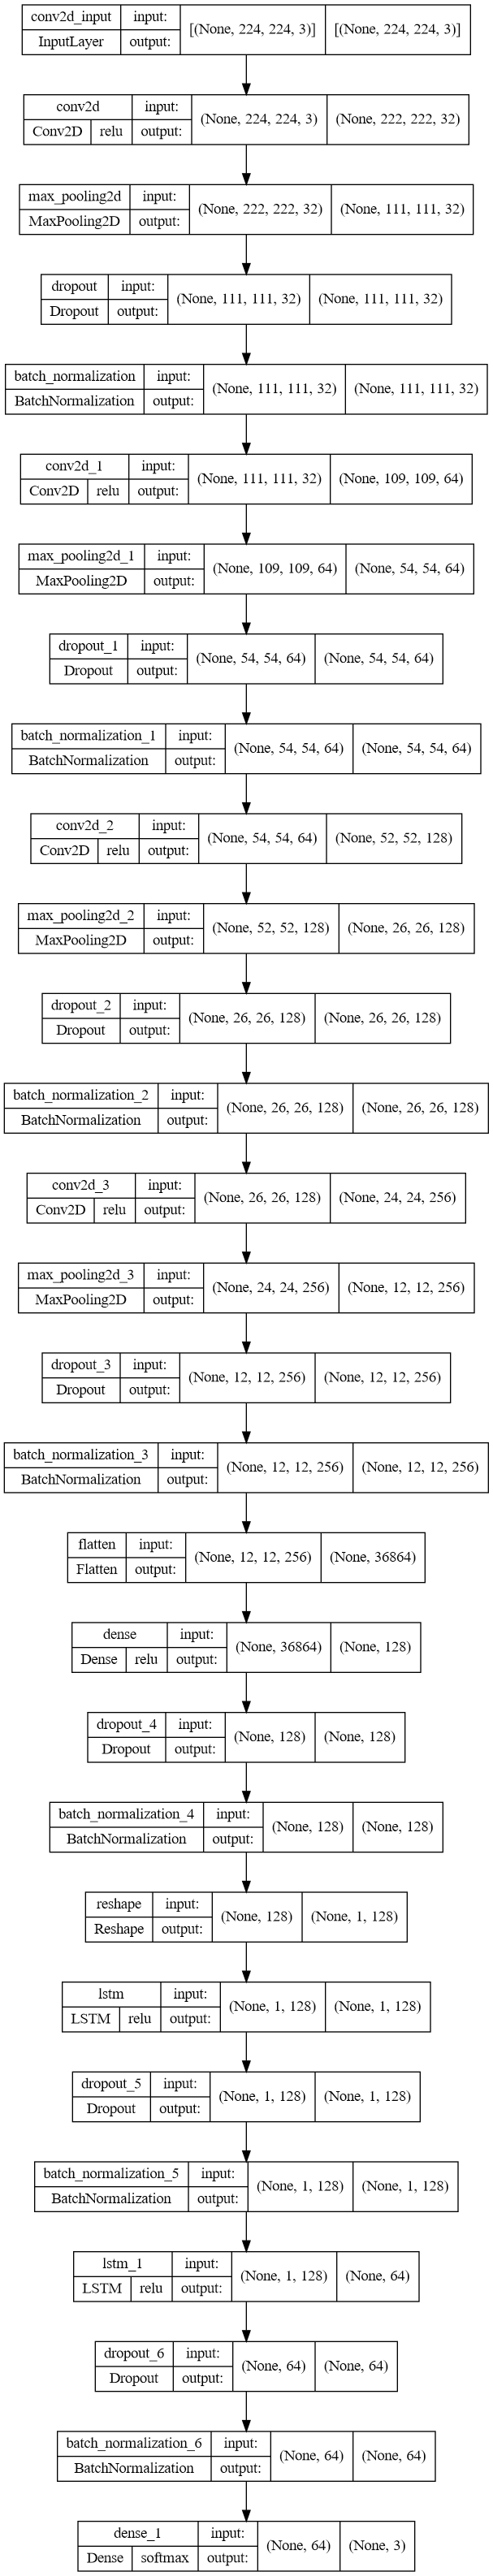

In [65]:
from keras.utils.vis_utils import plot_model
plot_model(model_cnn_p_lstm_with_batch, r'C:\My_projects\nuke\metrics\architecture\CNN_P_LSTM_with_BatchNormalization.png', show_shapes=True, show_layer_activations = True)

In [66]:
hist_cnn_p_lstm_with_batch = model_cnn_p_lstm_with_batch.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=32, epochs=20)

Epoch 1/20
63/63 [==============================] - 8s 82ms/step - loss: 1.2954 - accuracy: 0.4554 - precision: 0.4610 - recall: 0.3592 - f1_score: 0.3682 - val_loss: 0.8902 - val_accuracy: 0.6789 - val_precision: 0.6789 - val_recall: 0.6789 - val_f1_score: 0.2696
Epoch 2/20
63/63 [==============================] - 5s 72ms/step - loss: 1.0535 - accuracy: 0.5341 - precision: 0.5704 - recall: 0.4524 - f1_score: 0.3807 - val_loss: 0.8370 - val_accuracy: 0.6789 - val_precision: 0.6789 - val_recall: 0.6789 - val_f1_score: 0.2696
Epoch 3/20
63/63 [==============================] - 4s 70ms/step - loss: 0.9469 - accuracy: 0.6004 - precision: 0.6371 - recall: 0.5222 - f1_score: 0.4000 - val_loss: 0.8335 - val_accuracy: 0.6789 - val_precision: 0.6789 - val_recall: 0.6789 - val_f1_score: 0.2696
Epoch 4/20
63/63 [==============================] - 5s 72ms/step - loss: 0.8871 - accuracy: 0.6333 - precision: 0.6606 - recall: 0.5615 - f1_score: 0.3874 - val_loss: 0.8753 - val_accuracy: 0.6789 - val_pr

In [67]:
model_cnn_p_lstm_with_batch.save(r'C:\My_projects\nuke\models\CNN_P_LSTM_with_BatchNormalization')

INFO:tensorflow:Assets written to: C:\My_projects\nuke\models\CNN_P_LSTM_with_BatchNormalization\assets


INFO:tensorflow:Assets written to: C:\My_projects\nuke\models\CNN_P_LSTM_with_BatchNormalization\assets


#### visualize

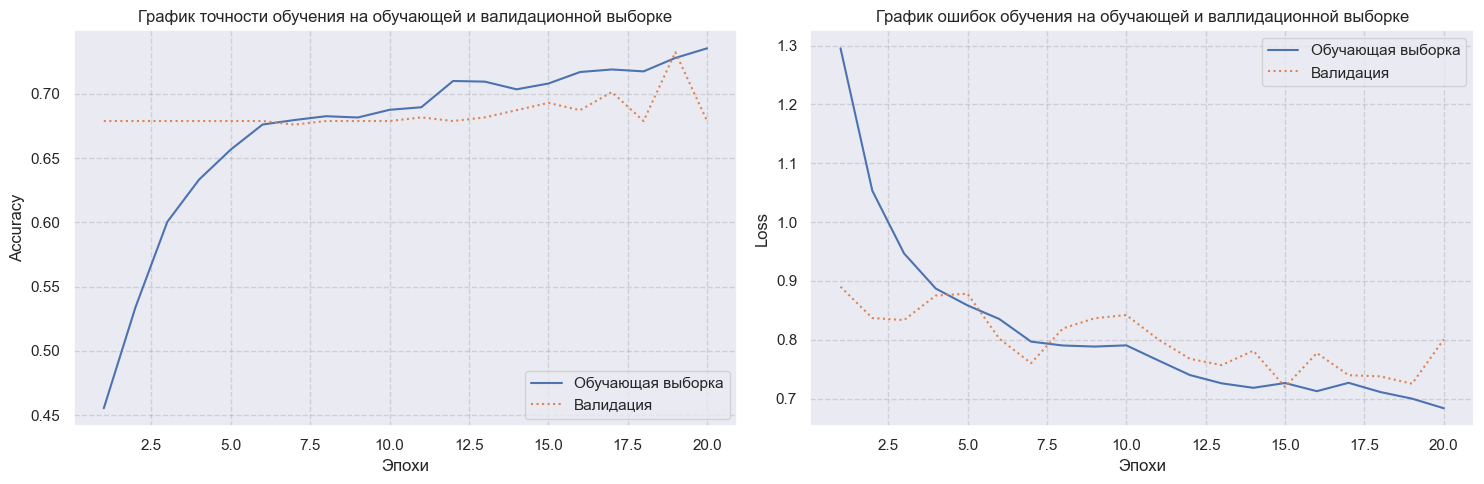

In [68]:
acc_plot = hist_cnn_p_lstm_with_batch.history['accuracy']
ls_plot = hist_cnn_p_lstm_with_batch.history['loss']

val_acc_plot = hist_cnn_p_lstm_with_batch.history['val_accuracy']

val_ls_plot = hist_cnn_p_lstm_with_batch.history['val_loss']
epochs = list(range(1, len(acc_plot) + 1))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_acc_plot, ':', label='Валидация')
plt.title('График точности обучения на обучающей и валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

# plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, ls_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_ls_plot, ':', label='Валидация')
plt.title('График ошибок обучения на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()
plt.savefig(r'C:\My_projects\nuke\metrics\matplot\CNN_P_LSTM_with_BatchNormalization_metrics_accuracy_and_loss.png')
plt.show()

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py

acc_plot = hist_cnn_p_lstm_with_batch.history['accuracy']
ls_plot = hist_cnn_p_lstm_with_batch.history['loss']

val_acc_plot = hist_cnn_p_lstm_with_batch.history['val_accuracy']

val_ls_plot = hist_cnn_p_lstm_with_batch.history['val_loss']
epochs = list(range(1, len(acc_plot) + 1))

fig = make_subplots(rows=1, cols=2, subplot_titles=("<b>Accuracy</b>", "<b>Loss</b>",), horizontal_spacing=0.05)

# Accuracy
fig.add_trace(go.Scatter(x=list(epochs), y=acc_plot, legendgroup='<b>Training</b>', name='<b>Training</b>',
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=1)
fig.add_trace(go.Scatter(x=list(epochs), y=val_acc_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>',
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=1)

# Loss
fig.add_trace(go.Scatter(x=list(epochs), y=ls_plot, legendgroup='<b>Training</b>', name='<b>Training</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, color='#636efb'), mode='markers+lines', marker=dict(color='#636efb')), row=1, col=2)
fig.add_trace(go.Scatter(x=list(epochs), y=val_ls_plot, legendgroup='<b>Validation</b>', name='<b>Validation</b>', showlegend=False,
                            line=dict(shape='spline', smoothing=0.8, dash='dot', color='red'), mode='markers+lines', marker=dict(color='red')), row=1, col=2)


fig.update_traces(hovertemplate='Epoch: %{x}<br>Value: %{y}')

fig.update_yaxes(title_text="<b>Показатели</b>")
fig.update_xaxes(title_text="<b>Эпохи</b>")
fig.update_layout(legend=dict(font=dict(size=14), bgcolor='lightgray'))


fig.update_layout(
    height=550, 
    width=2000, 
    title_text="<b>Метрики обучения</b>",
    legend=dict(
        font=dict(size=14),
        bgcolor='rgba(240, 240, 240, 0.5)',
        bordercolor='rgba(200, 200, 200, 1)',
        borderwidth=1,
    ),
    plot_bgcolor='rgba(210, 210, 210, 0.5)',
    
    # paper_bgcolor='rgba(250, 250, 250, 1)'
)
fig.update_xaxes(range=[0.5, max(epochs)+0.3])
py.plot(fig, filename=r'C:\My_projects\nuke\metrics\plotly\CNN_P_LSTM_with_BatchNormalization_metrics_accuracy_and_loss.html')
fig.write_image(r"C:\My_projects\nuke\metrics\plotly\CNN_P_LSTM_with_BatchNormalization_metrics_accuracy_and_loss.svg")
fig.show()

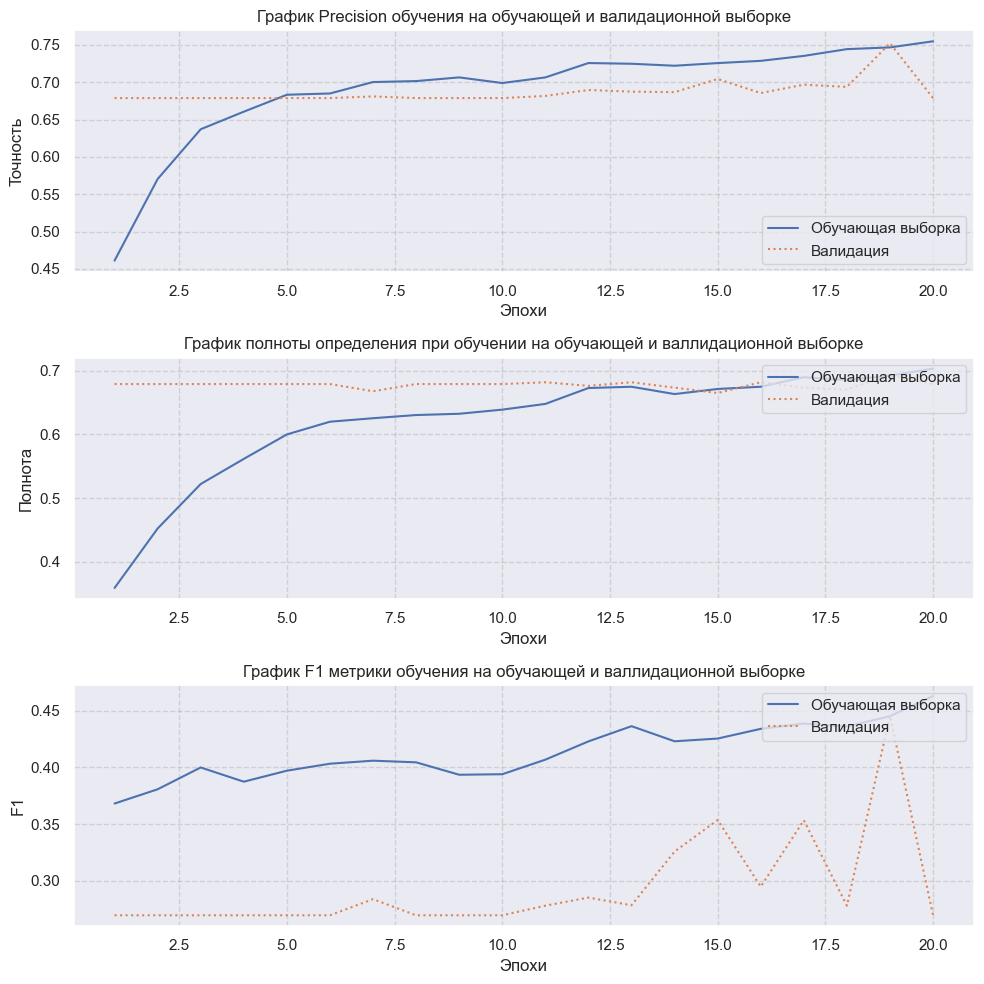

In [70]:
precision_plot = hist_cnn_p_lstm_with_batch.history['precision']
recall_plot = hist_cnn_p_lstm_with_batch.history['recall']
f1_plot = hist_cnn_p_lstm_with_batch.history['f1_score']

val_precision_plot = hist_cnn_p_lstm_with_batch.history['val_precision']
val_recall_plot = hist_cnn_p_lstm_with_batch.history['val_recall']
val_f1_plot = hist_cnn_p_lstm_with_batch.history['val_f1_score']

epochs = list(range(1, len(precision_plot) + 1))

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, индекс 1
plt.plot(epochs, precision_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_precision_plot, ':', label='Валидация')
plt.title('График Precision обучения на обучающей и валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

# plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 2)
plt.plot(epochs, recall_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_recall_plot, ':', label='Валидация')
plt.title('График полноты определения при обучении на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Полнота')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(epochs, f1_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_f1_plot, ':', label='Валидация')
plt.title('График F1 метрики обучения на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('F1')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()
plt.savefig(r'C:\My_projects\nuke\metrics\matplot\CNN_P_LSTM_with_BatchNormalization_metrics_precision_and_recall_and_f1.png')
plt.show()

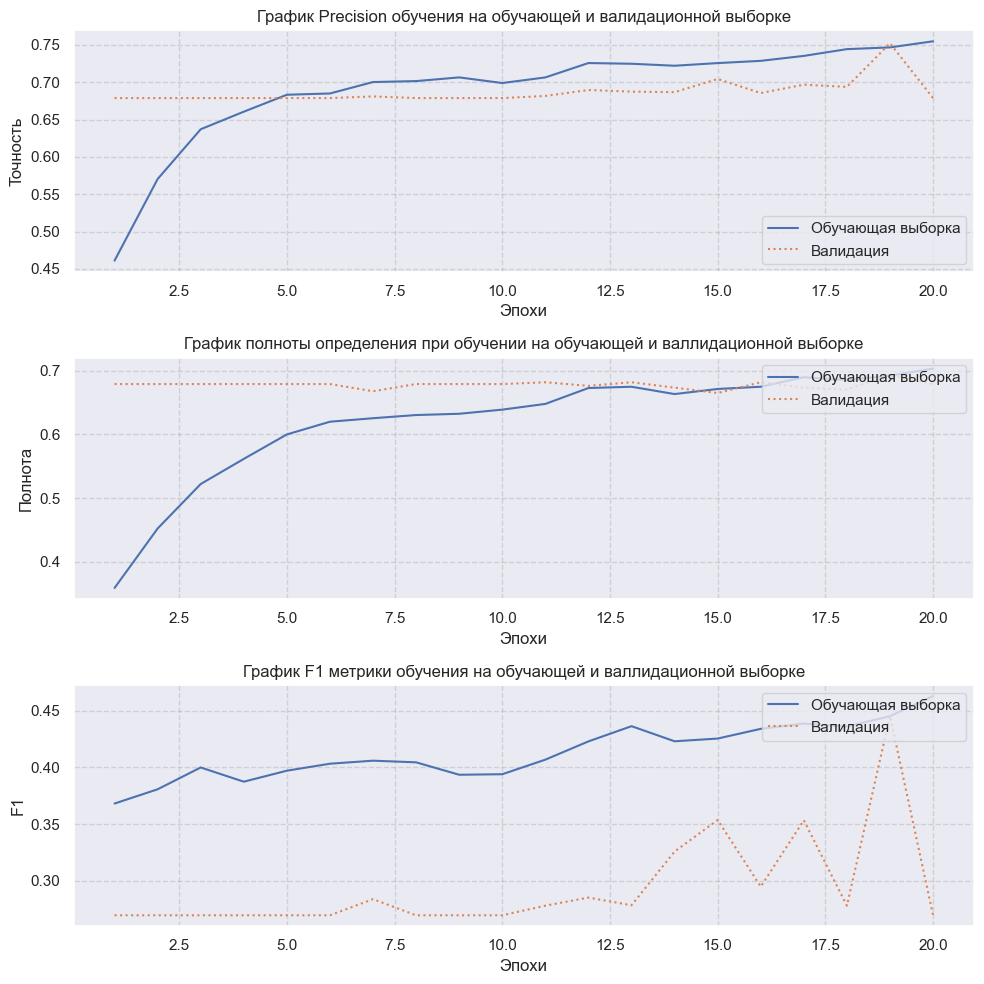

In [71]:
precision_plot = hist_cnn_p_lstm_with_batch.history['precision']
recall_plot = hist_cnn_p_lstm_with_batch.history['recall']
f1_plot = hist_cnn_p_lstm_with_batch.history['f1_score']

val_precision_plot = hist_cnn_p_lstm_with_batch.history['val_precision']
val_recall_plot = hist_cnn_p_lstm_with_batch.history['val_recall']
val_f1_plot = hist_cnn_p_lstm_with_batch.history['val_f1_score']

epochs = list(range(1, len(precision_plot) + 1))

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, индекс 1
plt.plot(epochs, precision_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_precision_plot, ':', label='Валидация')
plt.title('График Precision обучения на обучающей и валидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

# plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 2)
plt.plot(epochs, recall_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_recall_plot, ':', label='Валидация')
plt.title('График полноты определения при обучении на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('Полнота')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(epochs, f1_plot, '-', label='Обучающая выборка')
plt.plot(epochs, val_f1_plot, ':', label='Валидация')
plt.title('График F1 метрики обучения на обучающей и валлидационной выборке')
plt.xlabel('Эпохи')
plt.ylabel('F1')
plt.legend(loc='upper right')
plt.grid(True, color='gray', alpha = 0.25, linestyle='--')
plt.tight_layout()
plt.savefig(r'C:\My_projects\nuke\metrics\matplot\CNN_P_LSTM_with_BatchNormalization_metrics_precision_and_recall_and_f1.png')
plt.show()

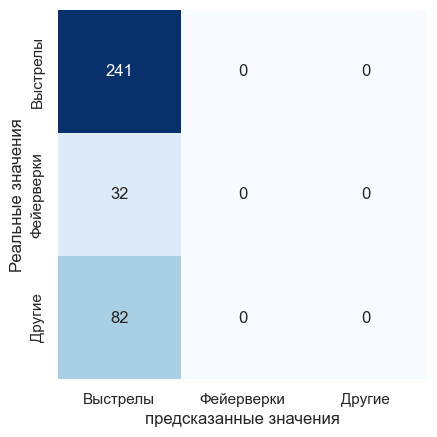

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model_cnn_p_lstm_with_batch.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))

class_labels = ['Выстрелы', 'Фейерверки', 'Другие']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('предсказанные значения')
plt.ylabel('Реальные значения')
plt.savefig(r'C:\My_projects\nuke\metrics\confusion_matrix_CNN_P_LSTM_with_BatchNormalization.png')

#### test model

In [77]:
images, labels = load_images_from_path('Spectrograms/samples/Chiikawa Usagi', 0, 'l')
# show_images(images)
    
x = images
y_real = labels
images, labels = load_images_from_path('Spectrograms/samples/IMG_9658', 0, 'l')
x += images
y_real += labels

In [78]:
y = model_cnn_p_lstm_with_batch.predict(np.array(x) / 255)

In [79]:
class_labels = ['Выстрелы', 'Фейерверки', 'Другие']

for k in range(len(y_real)):
    for i, label in enumerate(class_labels):
        print(f'{label}: {y[k][i]}')

Выстрелы: 0.7083336114883423
Фейерверки: 0.08119427412748337
Другие: 0.21047216653823853
Выстрелы: 0.6457791328430176
Фейерверки: 0.09438954293727875
Другие: 0.25983133912086487
